In [11]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx

In [12]:
file = open("ddd.txt", 'r')
info = file.readline().strip().replace("\n", "").split(" ")
num_nodes = int(info[0])
num_edges = int(info[1])

nodes = range(1, num_nodes+1)
edges = []

while True:
    edge_tmp = file.readline()
    if not edge_tmp:
        break
    edge_tmp = edge_tmp.strip().replace("\n", "").split(" ")
    edge_tmp = (int(edge_tmp[0]), int(edge_tmp[1]))
    edges.append(edge_tmp)
    
file.close()
print("num_nodes:", num_nodes)
print("num_edges:", num_edges)

num_nodes: 20
num_edges: 120


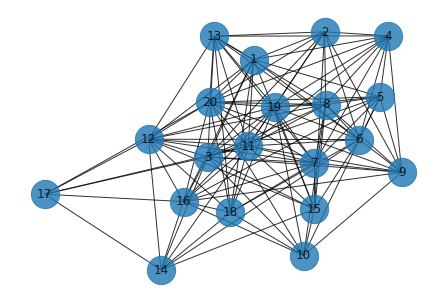

In [13]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, alpha=0.8, node_size=800)

$ \text{# Notation} $
$$ G = \text{Graph(V, E)} $$
$$ n = \text{number of nodes}$$
$$ V = \text{set of nodes of G} \space = \{v_1, v_2, ..., v_n\} $$
$$ E = \text{set of edges of G} \space =\{e_1, e_2, ..., e_{n-1}\} $$

$$ P_1 = \text{Graph(}V_1\text{, }E_1\text{)}$$
$$ P_1 \subset G $$
$$ P_2 = \text{Graph(}V_2\text{, }E_2\text{)}$$
$$ P_2 \subset G $$
$$ V_2 \cap V_1 = \phi $$

$$ S_i = \begin{cases} 1 & S_i \in V_1, S_i \in V \\ 0 & S_i \in V_2, S_i \in V \end{cases}$$

$$ W_{ij} = \text{weight of edge i to j} $$

$ \text{# Objective} $
$$ \max{Z} = \sum \limits _{1 <= i < j <= n} ^{n} W_{ij} \left(|S_i - S_j|\right) $$

$ \text{# Constraints } $
$$ x_i + x_j \le 1, \forall 1 \le i < j \le n $$

In [14]:
# model = gp.Model()
# x = model.addVars(G.nodes(), vtype=GRB.BINARY, name="x")

# obj = gp.LinExpr()
    
# for i in range(1, num_nodes + 1):
#     for j in range(i + 1, num_nodes + 1):
#         if i in x and j in x:
#             obj += (x[i] - x[j]) * (x[i] - x[j]) 

# model.setObjective(obj, GRB.MAXIMIZE)

In [15]:
model = gp.Model()
x = model.addVars(G.nodes(), vtype=GRB.BINARY, name="x")
obj = gp.LinExpr()

for (i, j) in G.edges():
    obj += 1 * (x[i] + x[j])

model.addConstrs((x[i] + x[j] <= 1 for (i, j) in G.edges()), name="c")

model.setObjective(obj, GRB.MAXIMIZE)

In [16]:
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 12 physical cores, 20 logical processors, using up to 20 threads
Optimize a model with 121 rows, 20 columns and 242 nonzeros
Model fingerprint: 0x72803e3e
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 42.0000000
Presolve removed 96 rows and 1 columns
Presolve time: 0.00s
Presolved: 25 rows, 19 columns, 123 nonzeros
Variable types: 0 continuous, 19 integer (19 binary)

Root relaxation: objective 4.620000e+01, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      46.0000000   46.00000  0.00%     -    0s

Explored 1 nodes (22 simplex iterations) i

In [17]:
for v in model.getVars():
    print(v.varName, int(v.x))
print("\n"+"objective value:", model.objVal)

x[1] 1
x[2] 0
x[3] 0
x[4] 0
x[5] 0
x[6] 0
x[7] 0
x[8] 0
x[9] 1
x[10] 0
x[11] 0
x[12] 0
x[13] 0
x[14] 1
x[15] 0
x[16] 0
x[17] 0
x[18] 0
x[19] 1
x[20] 0

objective value: 46.0


In [18]:
# result = ""
# for ed in edges:
#     if drs[ed[0]-1] != drs[ed[1]-1]:
#         result += str(1)
#     else:
#         result += str(0)
# print(result)